# Titanic Survival Prediction

## Objectives:
- The objectives of this project is **to experiment with different classification methods to see which yields the highest accuracy  and which one is the best model**

## Steps included in this project:
1. Importing Libraries
2. Loading Data
3. Understanding Data
4. Visualization(Exploring Variables_Data Anylasis)
5. Data Preprocessing
6. Feature Selection
7. Preparing Data for Modelling
8. Applying different models

# 1) Importing the Libraries

In [1]:
import os 
import numpy as np # linear algebra
import pandas as pd # data processing

# control and manage warnings
import warnings
warnings.filterwarnings('ignore')

# Data visualization setup
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid") # Set the style of seaborn

# 2) Loading the dateset

In [2]:
# Load the Titanic dataset from "tested.csv" into a Pandas DataFrame

titanic = pd.read_csv("tested.csv")
titanic.head() #Display the 1st five rows of the DataFrame to inspect the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**About the columns**

- **PassengerId** : Passenger number
- **Survived** : 0 = Dead 1 = Alive
- **Pclass** : 1 = First class 2 = Second class 3 = Third class
- **Name** : Name of passenger
- **Sex** : Gender
- **Age** : Age of passenger
- **SibSp** : Number of Siblings/Spouses Aboard. parch. Number of Parents/Children Aboard
- **Parch** : Number of Parents/Children Aboard. ticket. Ticket Number
- **Ticket** : Ticket number
- **Fare** : Passenger fare
- **Cabin** : Cabin number
- **Embarked** : Embarked implies where the traveler mounted from. There are three possible values for Embark —   Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

# 3) Understanding the data

In [3]:
# Display the shape of the dataset
titanic.shape

(418, 12)

In [4]:
# Display information about the Titanic dataset including data types and missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# Statistical description of numerical variables of the Titanic dataset
titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


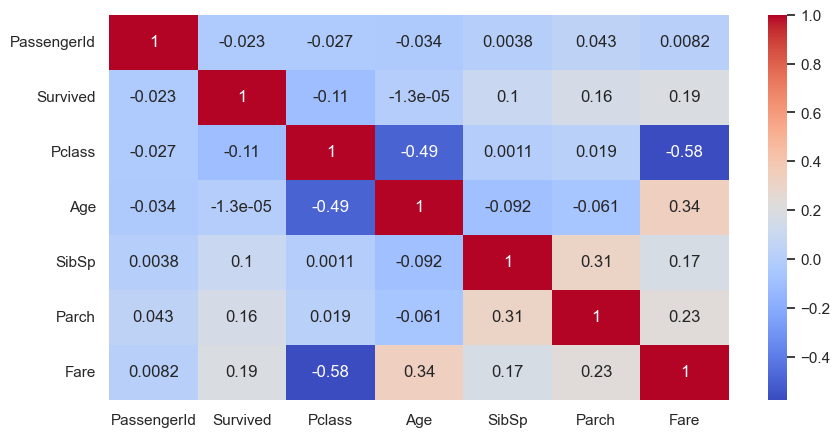

In [7]:
plt.figure(figsize = (10,5))
sns.heatmap(corr , annot = True, cmap = 'coolwarm')
plt.show()

# 4) Visualization(Exploring Variables_Data Anylasis)

### The overall Survival ratio

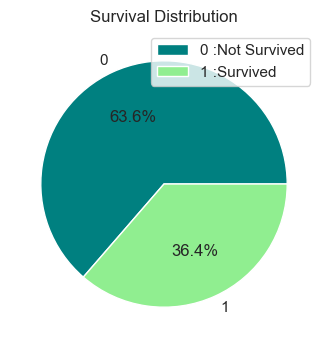

In [8]:
# Count the occurrences of each value in the 'Survived' column
survived_counts = titanic['Survived'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', colors=['teal', 'lightgreen'])
plt.title('Survival Distribution')
plt.legend(labels=['0 :Not Survived', '1 :Survived'], loc='upper right')
plt.show()

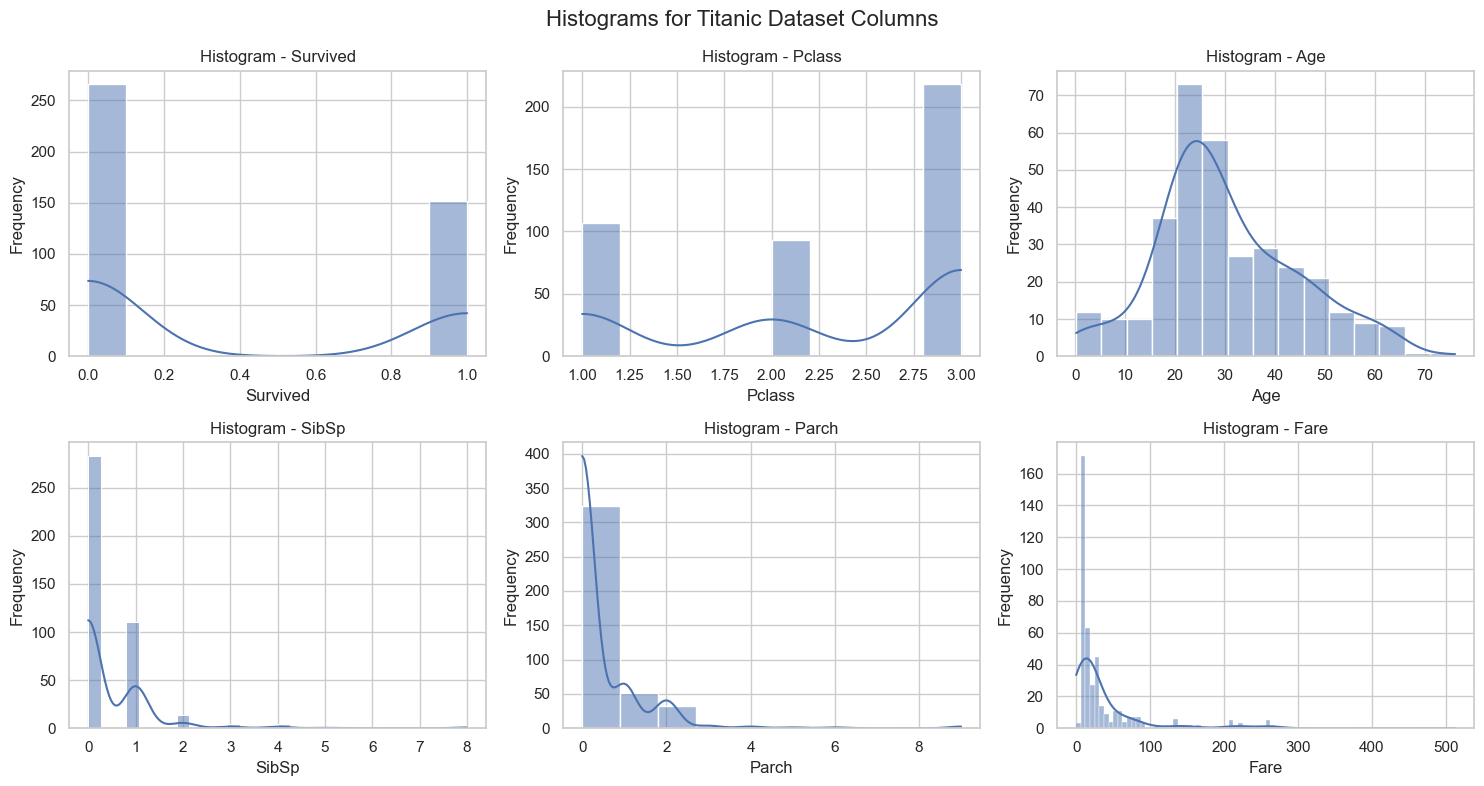

In [9]:
# Assuming 'titanic' is your DataFrame
columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create subplots 
plt.figure(figsize=(15, 8))
plt.suptitle('Histograms for Titanic Dataset Columns', fontsize=16)

for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(titanic[column], palette='plasma', kde=True)
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

### Comparing the number of Survived people by gender to the total number of people 

In [10]:
# Calculate total count by gender
total_counts = titanic['Sex'].value_counts()
print(total_counts)

print("---------"*10)

# Calculate survived count by gender
survived_counts = titanic[titanic['Survived'] == 1].groupby('Sex').size()
print(survived_counts)

male      266
female    152
Name: Sex, dtype: int64
------------------------------------------------------------------------------------------
Sex
female    152
dtype: int64


In [11]:
# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Total': total_counts, 'Survived': survived_counts})
df_plot

,Total,Survived
female,152,152.0
male,266,NaN


<Figure size 800x600 with 0 Axes>

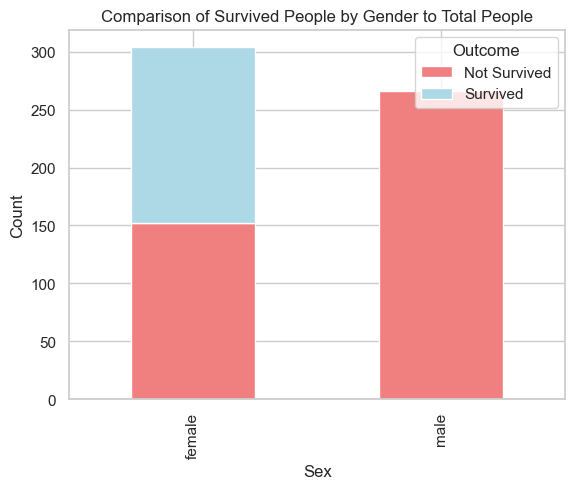

In [12]:
# Plotting
plt.figure(figsize=(8, 6))
df_plot.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Comparison of Survived People by Gender to Total People')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Not Survived', 'Survived'])

# Show the plot
plt.show()

- The graph shows the number of people who survived and did not survive the Titanic accident based on their gender.
- It shows that more women survived compared to men, indicating a higher survival rate for females.

###  Comparing the number of Survived people by Gender(Sex) and Age  

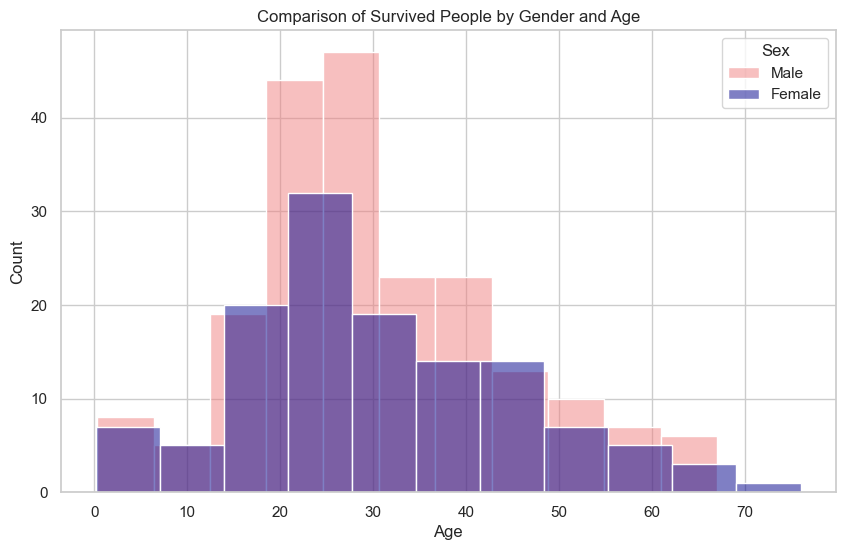

In [13]:
#Set up the figure
plt.figure(figsize=(10, 6))

# Plot histograms for age by gender and survival status
sns.histplot(data=titanic[titanic['Survived'] == 0],x='Age',hue='Sex',palette={'male': 'lightcoral', 'female': 'darkgreen'})
sns.histplot(data=titanic[titanic['Survived'] == 1],x='Age',hue='Sex',palette={'male': 'lightblue', 'female': 'darkblue'})

# Set labels and title
plt.title('Comparison of Survived People by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'],)

# Show the plot
plt.show()

###  Comparing the number of Survived people by Gender(Sex), Age and Pclass 

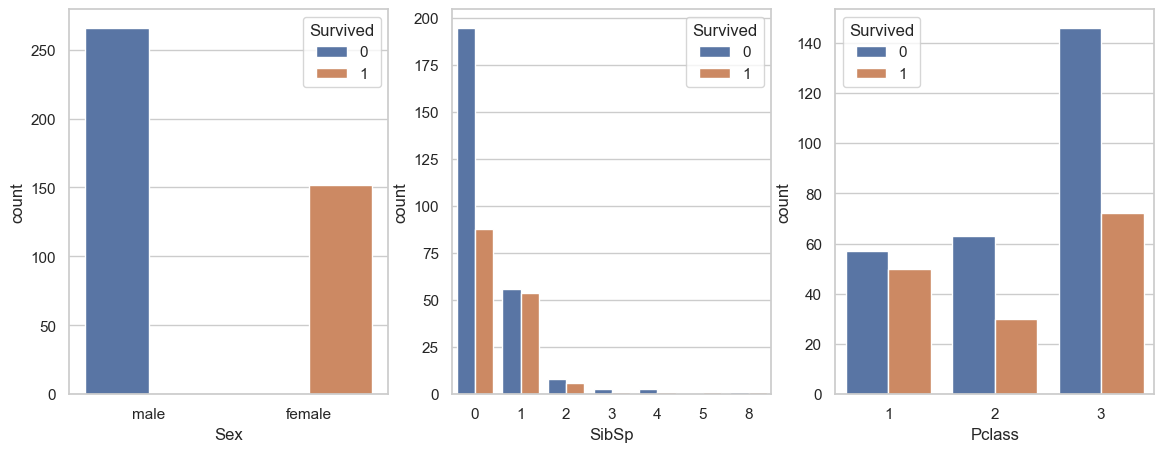

In [14]:
# Set up the subplots
plt.figure(figsize=(14, 5))

# Plotting count plots for 'Sex', 'SibSp', and 'Pclass' with survival status
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', data=titanic, hue='Survived')

plt.subplot(1, 3, 2)
sns.countplot(x='SibSp', data=titanic, hue='Survived')

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=titanic, hue='Survived')


# Show the plot
plt.show()

###  Comparing the number of Survived people by Age and Fare

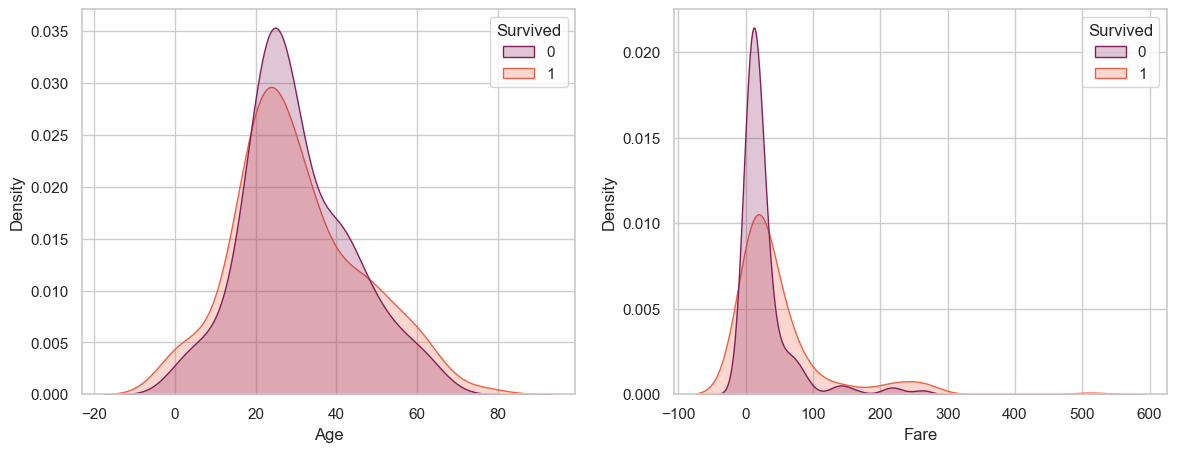

In [15]:
# Set up the subplots
plt.figure(figsize=(14, 5))

# KDE plot for 'Age' with survival status
plt.subplot(1, 2, 1)
sns.kdeplot(data=titanic, x='Age', hue='Survived', fill=True, palette='rocket', common_norm=False)

# KDE plot for 'Fare' with survival status
plt.subplot(1, 2, 2)
sns.kdeplot(data=titanic, x='Fare', hue='Survived', fill=True, palette='rocket', common_norm=False)

# Show the plot
plt.show()

###  Comparing the number of Survived people by Pclass and Embarked

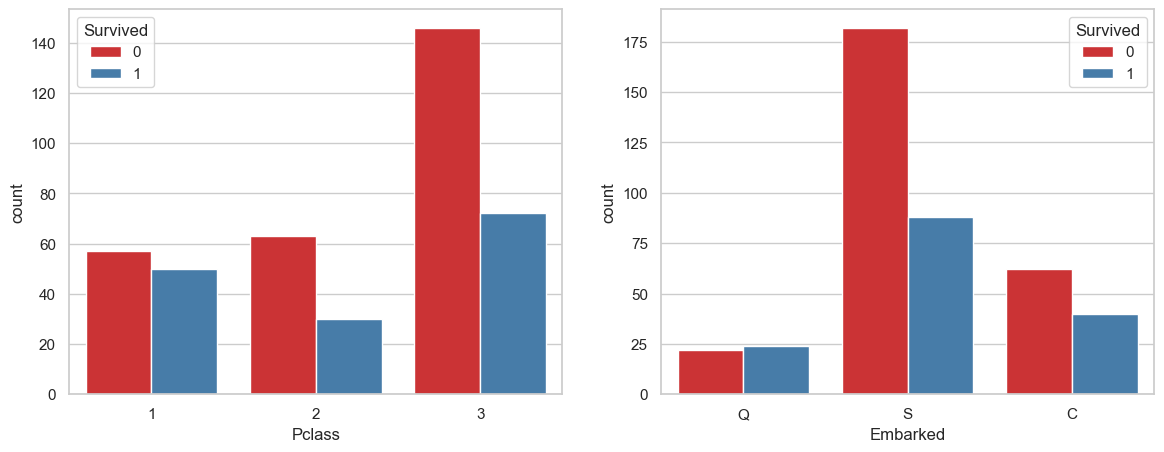

In [16]:
# Set up the subplots
plt.figure(figsize=(14, 5))

# Plotting count plots for 'Pclass', 'deck', and 'Embarked' with survival status
plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', data=titanic, hue='Survived', palette='Set1')

plt.subplot(1, 2, 2)
sns.countplot(x='Embarked', data=titanic, hue='Survived', palette='Set1')

# Show the plot
plt.show()

###  Comparing the number of Survived people by Pclass, Sex, Age, SibSp, Parch, Fare and Embarked

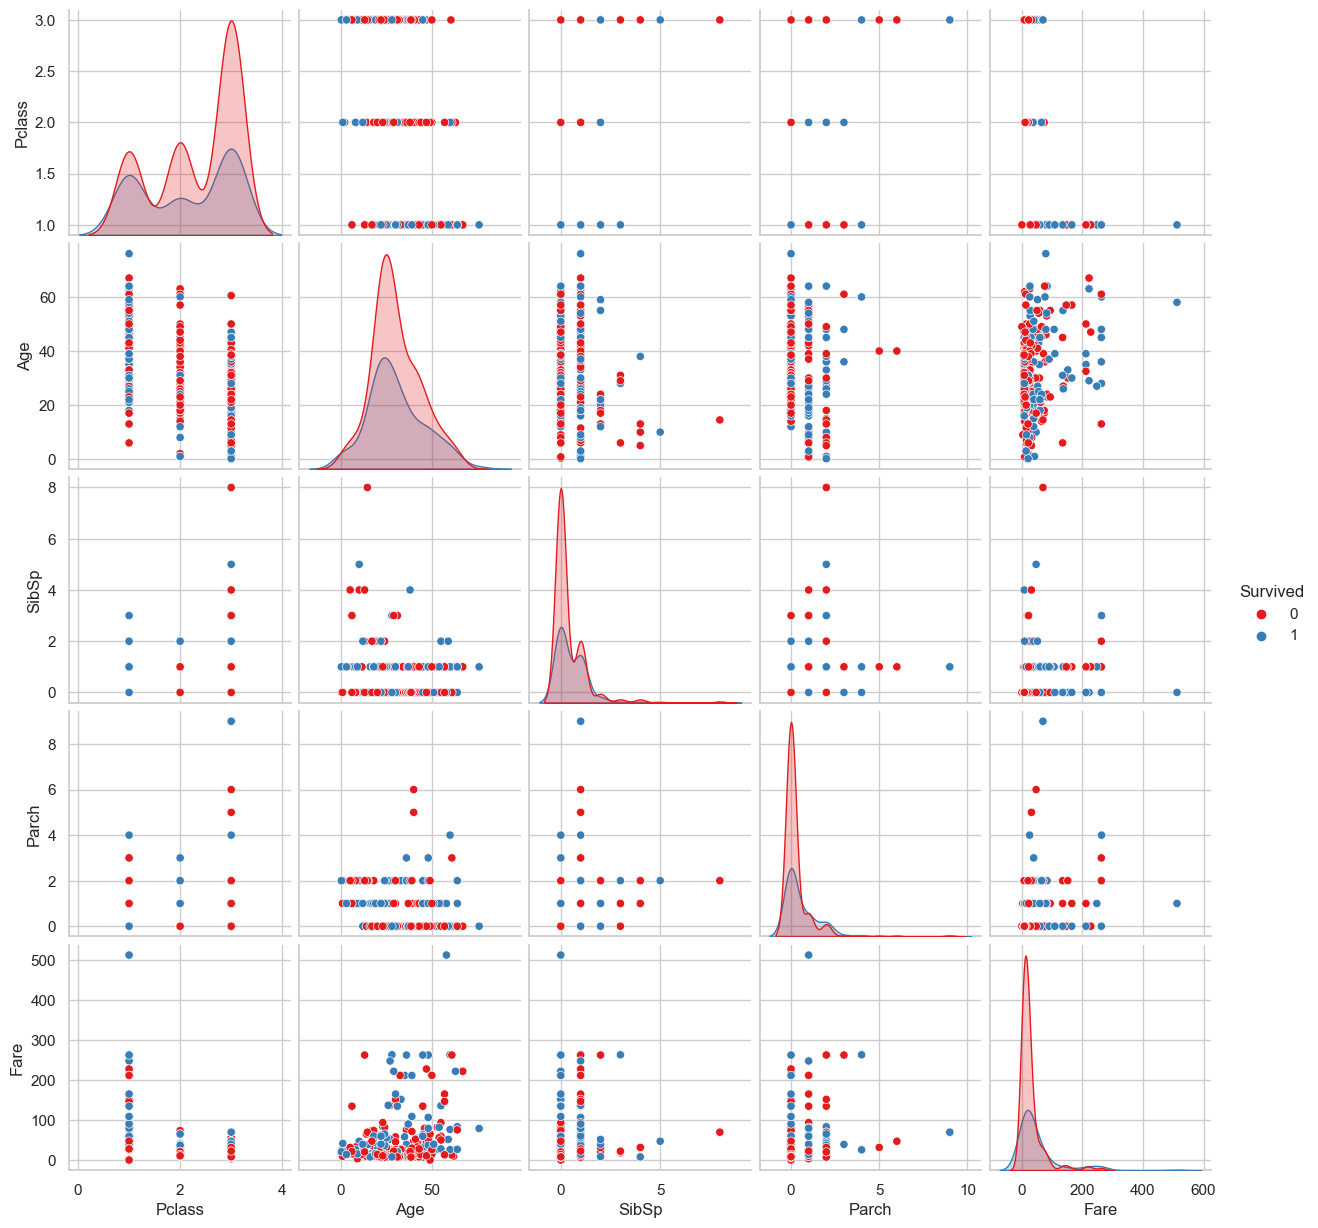

In [17]:
# Selecting relevant columns for the pair plot
columns= ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Creating a pair plot
sns.pairplot(titanic[columns], hue='Survived', palette='Set1')

# Show the plot
plt.show()

# 5) Data Preprocessing

### (I) Missing value treatment

In [18]:
# Create a DataFrame to summarize missing data
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(),
                             'perc_missing': titanic.isnull().sum() / len(titanic) * 100})

# Display the missing_data DataFrame
print(missing_data)

             total_missing  perc_missing
PassengerId              0      0.000000
Survived                 0      0.000000
Pclass                   0      0.000000
Name                     0      0.000000
Sex                      0      0.000000
Age                     86     20.574163
SibSp                    0      0.000000
Parch                    0      0.000000
Ticket                   0      0.000000
Fare                     1      0.239234
Cabin                  327     78.229665
Embarked                 0      0.000000


### "Cabin"

- **We drop "Cabin" because It has approx.78% missing data.**
- Here, missing value of "cabin" variable is high. So, It can impact the quality and reliability of analysis or modeling.

In [19]:
# Drop the "Cabin" variable from the Titanic dataset
titanic = titanic.drop("Cabin", axis=1)

### "Age" 

- Almost 21% of the values are missing
- We have to check outlier and on that basis we have to decide imputation method

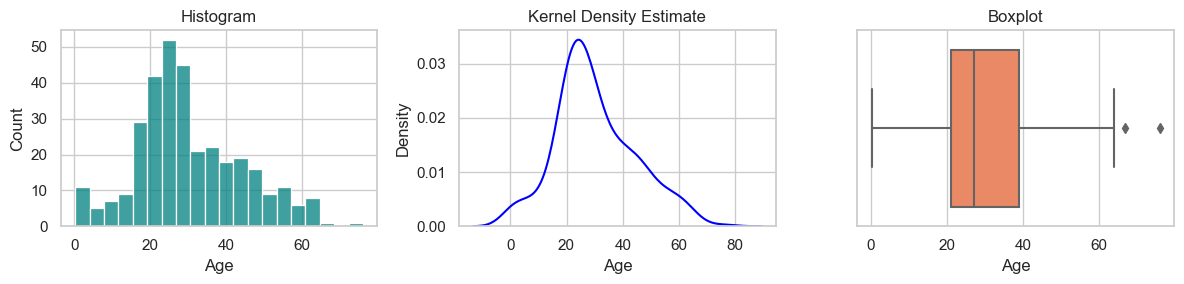

In [20]:
# Set up the plotting environment
plt.figure(figsize=(12, 3))

# Plot the histogram
plt.subplot(1, 3, 1)
sns.histplot(titanic['Age'], bins=20, kde=False, color='teal')
plt.title('Histogram')

# Plot the KDE
plt.subplot(1, 3, 2)
sns.kdeplot(titanic['Age'], color='blue')
plt.title('Kernel Density Estimate')

# Plot the boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=titanic['Age'], color='coral')
plt.title('Boxplot')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

- Here, we dealing with outliers, it's often to use the median for imputation to avoid undue influence from extreme values. 

In [21]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

### "Fare"

- Percentage of missing values in "Fare" variable is 0.239 %, which is very low

In [22]:
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

### (II) Encoding Part

In [23]:
# Categorical_columns = ['Sex', 'Embarked']
# Numrerical_columns =['Survived', 'Pclass','Age', 'SibSp', 'Parch', Fare]

In [24]:
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [25]:
# Label Encoder

titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Sex'] = titanic['Sex'].cat.codes

In [26]:
titanic['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [27]:
# Label Encoder

titanic['Embarked'] = titanic['Embarked'].astype('category')
titanic['Embarked'] = titanic['Embarked'].cat.codes

- We also see, that there are few columns, which are not of much importance in this process. Let us get rid of them.

In [28]:
titanic_data = titanic.drop(columns = ['PassengerId','Name','Ticket'],axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


### (III) Handling Outlier

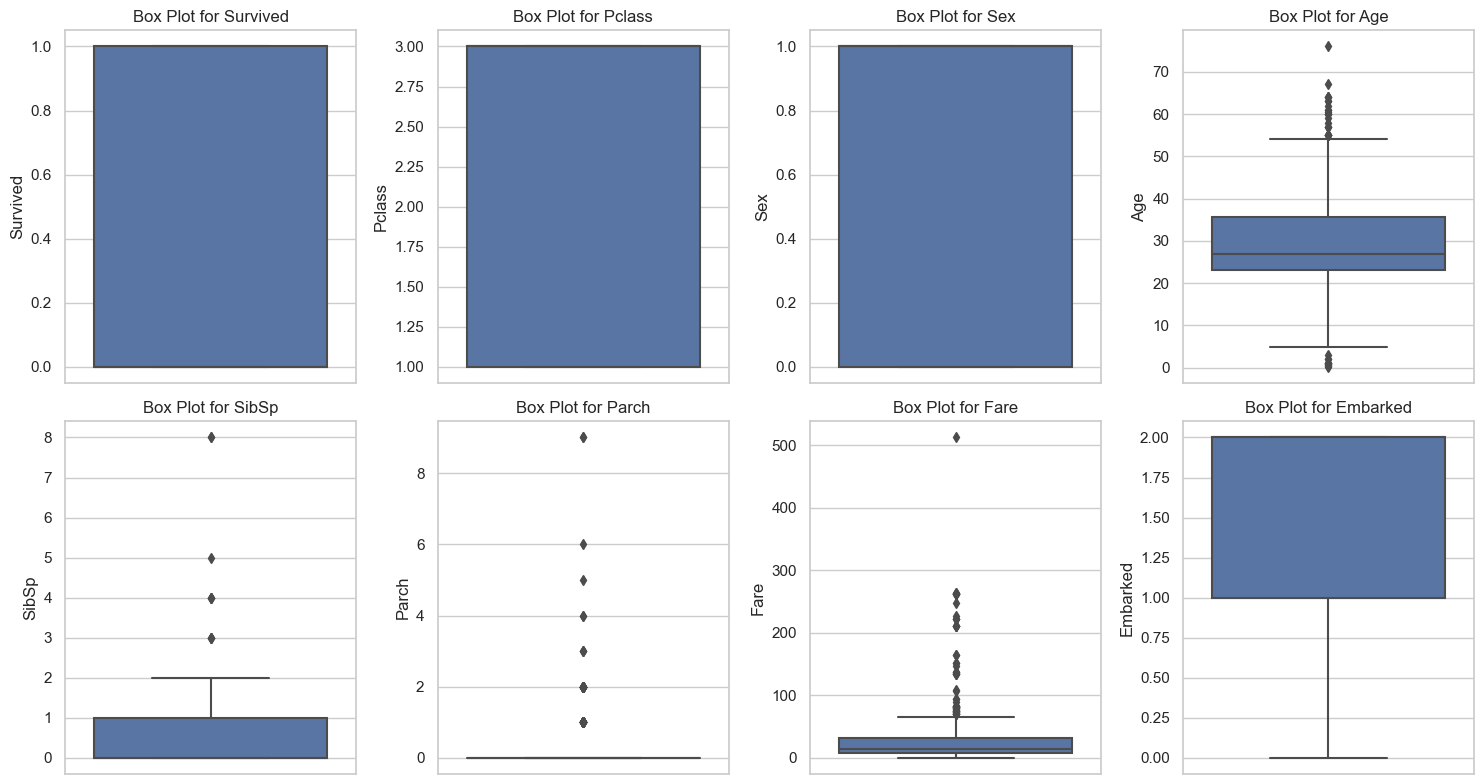

In [29]:
# Columns for box plots
columns_for_boxplot = ['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Set up subplots
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=column, data=titanic)
    plt.title(f'Box Plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
# Specify columns for outlier handling
columns_to_handle_outliers = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Function to handle outliers using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier handling to specified columns
for col in columns_to_handle_outliers:
    titanic = handle_outliers_iqr(titanic, col)

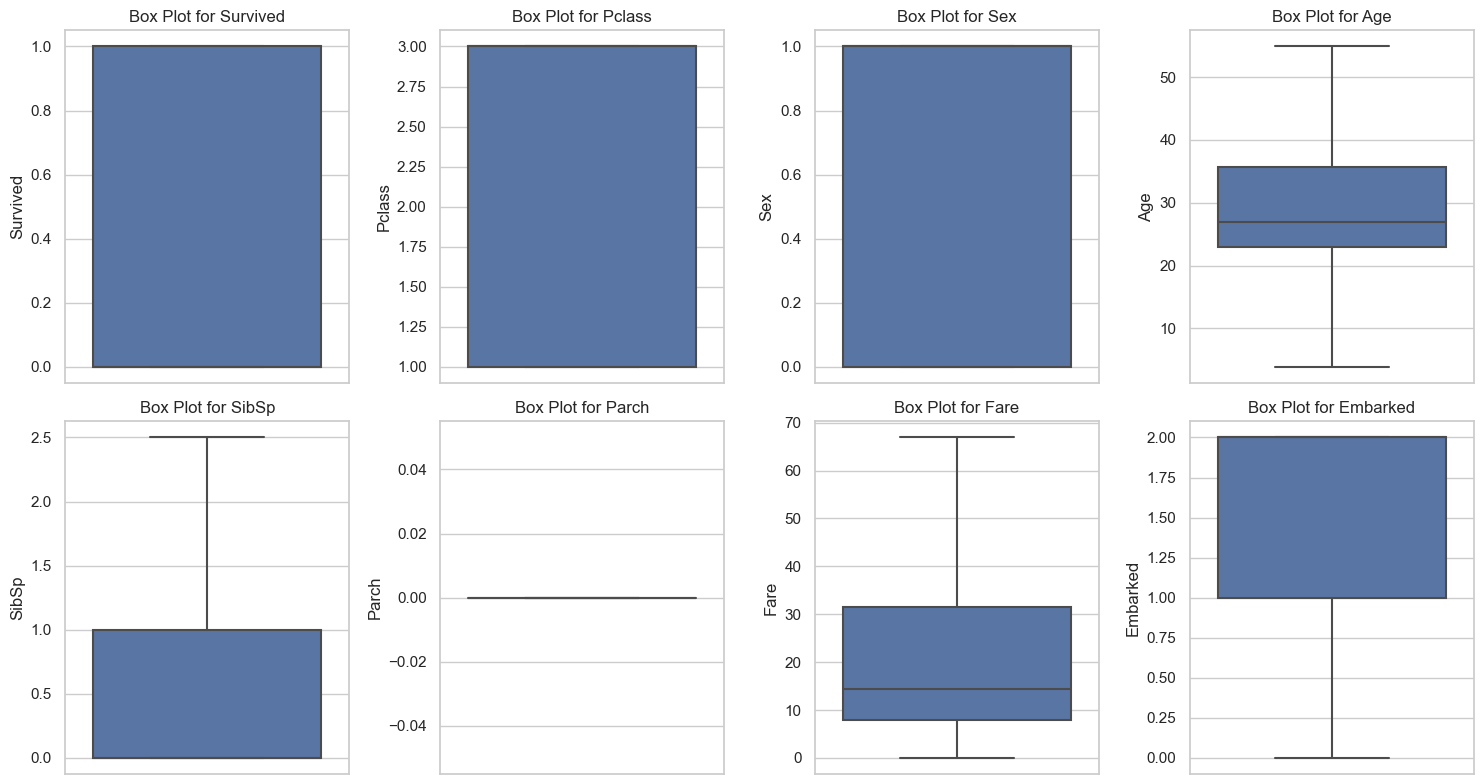

In [31]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=column, data=titanic)
    plt.title(f'Box Plot for {column}')

    
plt.tight_layout()

# Show the plots
plt.show()

# (6) Feature Selection

In [32]:
# Split the dataset into features (X) and target variable (y)
x = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

- Here, X is the feature variable, containing all the variables like  'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' excluding the 'Survived' column.

- Y, on the other hand, is the target variable, as that is the result that we want to determine,i.e, whether a person is alive.

# (7) Preparing Data for Modelling

In [33]:
# Split the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(334, 7) (84, 7) (334,) (84,)


**x_train**: contains a set of values from variable 'x'

**y_train**: contains the output (whether the person is alive or dead) of the corresponding value of x_train.

**x_test**: contains a set of values from variable 'x', excluding the ones from x_train.

**y_train**: contains the output (whether the person is alive or dead) of the corresponding value of x_test.

In [34]:
# Perform data preprocessing (e.g., scaling)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# (8) Applying Different Models
Here, we are using the folowing classifier models:
 1) Logistic Regression 
 2) Random Forest Classifie

### 1) Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
LR = LogisticRegression()
LR.fit(x_train, y_train)

# predict model
y_pred_train_LR = LR.predict(x_train)
y_pred_test_LR = LR.predict(x_test)

# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\033[1;31;3mAccuracy Score:\033[m")
print("Trainging Accuracy Score :", accuracy_score(y_test, y_pred_test_LR))
print()
print("\033[1;31;3mClassification Report:\033[m")
print(classification_report(y_test, y_pred_test_LR))
print()
print("\033[1;31;3mConfusion Matrix:\033[m")
print(confusion_matrix(y_test, y_pred_test_LR))

Accuracy Score:
Trainging Accuracy Score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Confusion Matrix:
[[50  0]
 [ 0 34]]


In [36]:
# Cross Validation
from sklearn.model_selection import cross_val_score

training_accuracy = cross_val_score(LR, x_train, y_train, cv=10)
test_accuracy = cross_val_score(LR, x_test, y_test, cv=10)

print("Model Accuracy after CV :", test_accuracy.mean())

Model Accuracy after CV : 0.9638888888888889


### 2) Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)

# predict model
y_pred_train_RF = RF.predict(x_train)
y_pred_test_RF = RF.predict(x_test)

# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\033[1;31;3mAccuracy Score:\033[m")
print("Trainging Accuracy Score :", accuracy_score(y_test, y_pred_test_RF))
print()
print("\033[1;31;3mClassification Report:\033[m")
print(classification_report(y_test, y_pred_test_RF))
print()
print("\033[1;31;3mConfusion Matrix:\033[m")
print(confusion_matrix(y_test, y_pred_test_RF))

Accuracy Score:
Trainging Accuracy Score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Confusion Matrix:
[[50  0]
 [ 0 34]]


In [38]:
# Cross Validation
from sklearn.model_selection import cross_val_score

training_accuracy = cross_val_score(RF, x_train, y_train, cv=10)
test_accuracy = cross_val_score(RF, x_test, y_test, cv=10)

print("Model Accuracy after CV :", test_accuracy.mean())

Model Accuracy after CV : 1.0


In [39]:
# Result for traning Accuracy after CV

results = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest classifier'],
    'Score': [0.9638888888888889, 0.9888888888888889]})

# Convert 'Score' to numeric to ensure proper sorting
results['Score'] = pd.to_numeric(results['Score'])

result_Titanic= results.sort_values(by='Score', ascending=True)

result_Titanic

,Model,Score
0,Logistic Regression,0.963889
1,Random Forest classifier,0.988889


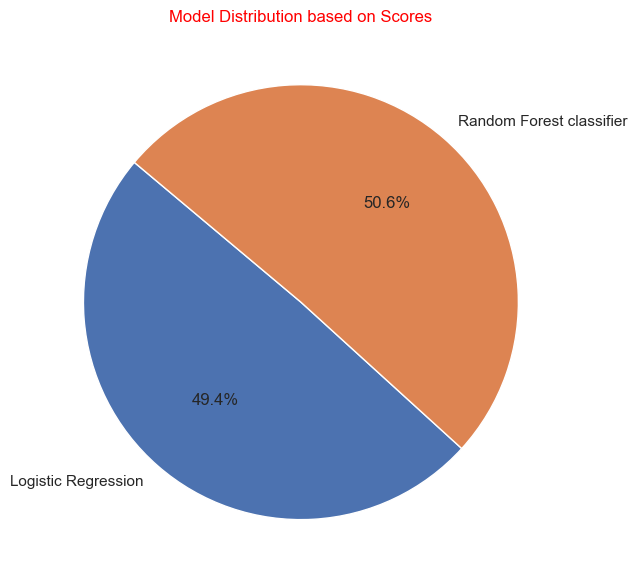

In [40]:
# Plotting a pie chart

plt.figure(figsize=(8, 6))
plt.pie(result_Titanic['Score'], labels= result_Titanic['Model'], autopct='%1.1f%%', startangle=140)
plt.title('Model Distribution based on Scores', color='red')  # Set the title color here
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

### We are getting better results for Random Forest classifier model with Cross-Validation